In [439]:
import pandas as pd
import numpy as np

### Unify country names

In [440]:
country_name_changes = {'Venezuela (Bolivarian Republic of)': 'Venezuela, RB',
'Viet Nam': 'Vietnam',
 'United States of America': 'United States',
 'United Republic of Tanzania': 'Tanzania',
 'United Kingdom of Great Britain and Northern Ireland': 'United Kingdom',
 'Slovakia': 'Slovak Republic',
 'Saint Lucia': 'St. Lucia',
 'Republic of Moldova': 'Moldova',
 "Democratic People's Republic of Korea":'Korea, Dem. People’s Rep.', 
 'Republic of Korea':'Korea, Rep.',
 'Kyrgyzstan': 'Kyrgyz Republic',
 'Iran (Islamic Republic of)': 'Iran, Islamic Rep.',
 'Gambia': 'Gambia, The',
 'Egypt': 'Egypt, Arab Rep.',
  "Côte d'Ivoire": "Cote d'Ivoire",
 'China, Hong Kong SAR': 'Hong Kong SAR, China',
 'China, Macao SAR':'Macao SAR, China',
 'China, mainland': 'China',
 'Bolivia (Plurinational State of)':'Bolivia',
 'Bahamas':'Bahamas, The',
 'Yemen': 'Yemen, Rep.'
}
def change_to_match_name(name):
    if name in country_name_changes.keys():
        return country_name_changes[name]
    else:
        return name

### Get the country codes (from FAO_Consumption dataset)

In [441]:
countries = pd.read_csv("FAO_Consumption.csv")

In [442]:
country_names = countries[["Country Name"]].dropna().drop_duplicates()

In [443]:
country_names

,Country Name
0,Afghanistan
5,Albania
10,Algeria
15,Angola
20,Antigua and Barbuda
...,...
845,Venezuela (Bolivarian Republic of)
850,Viet Nam
855,Yemen
860,Zambia


### Filter Country by GDP (Above average)

In [444]:
gdp = pd.read_csv("gdp.csv")
average_gdp = 6520.64991860447

In [445]:
gdp_filtered = gdp.melt(id_vars=["Unnamed: 0", "Country Name", "Country Code"], var_name="Year", value_name="GDP")
gdp_filtered = gdp_filtered.loc[gdp_filtered['Year'].isin(['2014', '2015', '2016', '2017'])]
gdp_filtered = gdp_filtered.loc[(gdp_filtered['GDP'] != "..")]
gdp_filtered = gdp_filtered[gdp_filtered['GDP'].notnull()].copy()
gdp_filtered["GDP"] = gdp_filtered["GDP"].astype(float)
gdp_filtered = gdp_filtered.groupby(['Country Name']).mean().reset_index()
gdp_filtered = pd.merge(country_names, gdp_filtered, left_on=['Country Name'], right_on=['Country Name'], how='left')

gdp_filtered_above = gdp_filtered.loc[(gdp_filtered['GDP'] >= average_gdp)]
gdp_filtered_below = gdp_filtered.loc[(gdp_filtered['GDP'] < average_gdp)]


gdp_filtered_above["Country Name"] = gdp_filtered_above["Country Name"].apply(change_to_match_name)
gdp_filtered_below["Country Name"] = gdp_filtered_below["Country Name"].apply(change_to_match_name)
gdp_filtered_above = gdp_filtered_above.drop(['Unnamed: 0', 'GDP'], axis=1)
gdp_filtered_below = gdp_filtered_below.drop(['Unnamed: 0', 'GDP'], axis=1)

<ipython-input-445-34f30bc2b31e>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered_above["Country Name"] = gdp_filtered_above["Country Name"].apply(change_to_match_name)
<ipython-input-445-34f30bc2b31e>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_filtered_below["Country Name"] = gdp_filtered_below["Country Name"].apply(change_to_match_name)


In [446]:
gdp_filtered_above

,Country Name
4,Antigua and Barbuda
5,Argentina
7,Australia
8,Austria
12,Barbados
...,...
156,Trinidad and Tobago
158,Turkey
159,Turkmenistan
162,United Arab Emirates


### Health GDP dataset

In [447]:
health_gdp = pd.read_csv("NHA indicators.csv")
health_gdp["Country Name"] = health_gdp["Country Name"].apply(change_to_match_name)
health_gdp

,Country Name,2014,2015,2016,2017
0,Algeria,360,292,261,258
1,Angola,132,109,95,114
2,Benin,34,31,30,30
3,Botswana,436,389,403,484
4,Burkina Faso,40,34,41,44
...,...,...,...,...,...
184,Solomon Islands,114,99,99,97
185,Tonga,226,187,215,233
186,Tuvalu,568,531,548,633
187,Vanuatu,107,116,82,85


Filter the countries

### Depression dataset

In [448]:
depression = pd.read_csv("depression.csv")

In [449]:
country_population = pd.read_csv("country_population.csv")
country_population = country_population[['Country Name', '2014', '2015', '2016', '2017']]
country_population['average'] = country_population[['2014', '2015', '2016', '2017']].mean(axis=1)

In [450]:
depression_filtered = depression.loc[depression['Year'].isin(['2014', '2015', '2016', '2017'])]
depression_filtered = depression_filtered[depression_filtered['Year'].notnull()].copy()
depression_filtered["Year"] = depression_filtered["Year"].astype(str)
depression_filtered["Country Name"] = depression_filtered["Country Name"].apply(change_to_match_name)

In [451]:
depression_filtered = pd.merge(depression_filtered, country_population[['Country Name', 'average']], left_on=['Country Name'], right_on=['Country Name'], how='left').dropna().drop_duplicates(subset=['Country Name'])

In [452]:
depression_filtered

,Unnamed: 0,Country Name,Year,Depression Count,average
0,24,Afghanistan,2014,8.844047e+05,3.486598e+07
4,52,Albania,2014,6.897047e+04,2.879841e+06
8,80,Algeria,2014,1.319985e+06,4.014808e+07
12,108,American Samoa,2014,1.443743e+03,5.574100e+04
20,164,Andorra,2014,3.168901e+03,7.788050e+04
...,...,...,...,...,...
896,6268,Vietnam,2014,2.690256e+06,9.315676e+07
912,6380,World,2014,2.524223e+08,7.381638e+09
916,6408,"Yemen, Rep.",2014,8.684233e+05,2.683110e+07
924,6436,Zambia,2014,3.798563e+05,1.612408e+07


### Normalization by population

In [453]:
normalized_values = depression_filtered["Depression Count"].div(depression_filtered['average'], axis=0)

In [454]:
normalized_values

0      0.025366
4      0.023949
8      0.032878
12     0.025901
20     0.040689
         ...   
896    0.028879
912    0.034196
916    0.032366
924    0.023558
932    0.022394
Length: 180, dtype: float64

###### Actual update

In [455]:
depression_filtered.update(normalized_values)

In [456]:
depression_filtered

,Unnamed: 0,Country Name,Year,Depression Count,average
0,24,Afghanistan,2014,8.844047e+05,3.486598e+07
4,52,Albania,2014,6.897047e+04,2.879841e+06
8,80,Algeria,2014,1.319985e+06,4.014808e+07
12,108,American Samoa,2014,1.443743e+03,5.574100e+04
20,164,Andorra,2014,3.168901e+03,7.788050e+04
...,...,...,...,...,...
896,6268,Vietnam,2014,2.690256e+06,9.315676e+07
912,6380,World,2014,2.524223e+08,7.381638e+09
916,6408,"Yemen, Rep.",2014,8.684233e+05,2.683110e+07
924,6436,Zambia,2014,3.798563e+05,1.612408e+07


## Correlation for depression and health GDP for countries above the average GDP

In [457]:
health_gdp_filtered_above = pd.merge(gdp_filtered_above, health_gdp, left_on=['Country Name'], right_on=['Country Name'], how='left')

In [458]:
health_gdp_filtered_above = health_gdp_filtered_above.melt(id_vars=["Country Name"], var_name="Year", value_name="Health GDP")

In [459]:
health_gdp_filtered_above

,Country Name,Year,Health GDP
0,Antigua and Barbuda,2014,793
1,Argentina,2014,"1,286"
2,Australia,2014,"5,608"
3,Austria,2014,"5,394"
4,Barbados,2014,"1,154"
...,...,...,...
255,Trinidad and Tobago,2017,"1,129"
256,Turkey,2017,443
257,Turkmenistan,2017,457
258,United Arab Emirates,2017,"1,650"


### Merge health GDP and depression datasets on Country and Year

In [460]:
health_gdp_depression_above = depression_filtered.merge(health_gdp_filtered_above, left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], how='right')

In [461]:
health_gdp_depression_above

,Unnamed: 0,Country Name,Year,Depression Count,average,Health GDP
0,220.0,Antigua and Barbuda,2014,2.350947e+03,94020.25,793
1,248.0,Argentina,2014,1.517814e+06,43359161.25,"1,286"
2,332.0,Australia,2014,1.054482e+06,24021112.00,"5,608"
3,360.0,Austria,2014,3.153283e+05,8680822.25,"5,394"
4,500.0,Barbados,2014,9.003030e+03,285544.50,"1,154"
...,...,...,...,...,...,...
255,NaN,Trinidad and Tobago,2017,NaN,NaN,"1,129"
256,NaN,Turkey,2017,NaN,NaN,443
257,NaN,Turkmenistan,2017,NaN,NaN,457
258,NaN,United Arab Emirates,2017,NaN,NaN,"1,650"


In [462]:
health_gdp_depression_above["Health GDP"] = health_gdp_depression_above["Health GDP"].apply(pd.to_numeric,errors='coerce')
health_gdp_depression_above = health_gdp_depression_above[health_gdp_depression_above['Health GDP'].notnull()].copy()
health_gdp_depression_above["Health GDP"] = health_gdp_depression_above["Health GDP"].astype(float)
health_gdp_depression_above = health_gdp_depression_above.drop(['Unnamed: 0'], axis=1)
health_gdp_depression_above.columns

Index(['Country Name', 'Year', 'Depression Count', 'average', 'Health GDP'], dtype='object')

In [463]:
health_gdp_depression_above_by_country = health_gdp_depression_above.groupby(['Country Name']).mean().reset_index()

In [464]:
health_gdp_depression_above_by_country.columns

Index(['Country Name', 'Depression Count', 'average', 'Health GDP'], dtype='object')

In [465]:
health_gdp_depression_above_by_country.fillna(health_gdp_depression_above_by_country["Depression Count"].mode()[0], inplace = True)

In [466]:
health_gdp_depression_above_by_country

,Country Name,Depression Count,average,Health GDP
0,Antigua and Barbuda,2.350947e+03,9.402025e+04,780.250000
1,Botswana,7.467374e+04,2.143600e+06,428.000000
2,Brazil,1.896705e+03,1.896705e+03,839.333333
3,Bulgaria,2.373222e+05,7.151424e+06,576.750000
4,China,5.494928e+07,1.375138e+09,395.250000
5,Colombia,1.037917e+06,4.789332e+07,495.000000
6,Costa Rica,1.311350e+05,4.873125e+06,863.750000
7,Croatia,1.502606e+05,4.185218e+06,862.250000
8,Cuba,4.449462e+05,1.132651e+07,946.000000
9,Dominica,1.896705e+03,7.125825e+04,398.500000


### Scatter plots

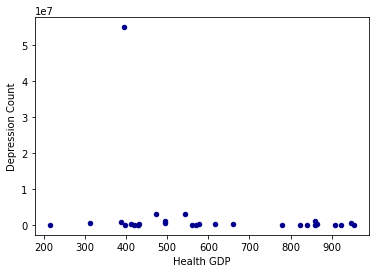

In [467]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


ax1 = health_gdp_depression_above_by_country.plot.scatter(x='Health GDP', y='Depression Count', c='DarkBlue')

### Correlation Coefficient

In [468]:
# calculate the correlation matrix
corr = health_gdp_depression_above_by_country.corr(method="spearman")
corr.loc['Depression Count']

Depression Count    1.000000
average             0.992188
Health GDP         -0.256634
Name: Depression Count, dtype: float64

## Correlation for depression and health GDP for countries above the below GDP

In [469]:
health_gdp_filtered_below = pd.merge(gdp_filtered_below, health_gdp, left_on=['Country Name'], right_on=['Country Name'], how='left')

In [470]:
health_gdp_filtered_below = health_gdp_filtered_below.melt(id_vars=["Country Name"], var_name="Year", value_name="Health GDP")

In [471]:
health_gdp_filtered_below

,Country Name,Year,Health GDP
0,Afghanistan,2014,59
1,Albania,2014,251
2,Algeria,2014,360
3,Angola,2014,132
4,Armenia,2014,406
...,...,...,...
315,Ukraine,2017,187
316,Uzbekistan,2017,93
317,Vanuatu,2017,85
318,Zambia,2017,68


### Merge health GDP and depression datasets on Country and Year

In [472]:
health_gdp_depression_below = depression_filtered.merge(health_gdp_filtered_below, left_on=['Country Name', 'Year'], right_on=['Country Name', 'Year'], how='right')

In [473]:
health_gdp_depression_below

,Unnamed: 0,Country Name,Year,Depression Count,average,Health GDP
0,24.0,Afghanistan,2014,8.844047e+05,34865981.25,59
1,52.0,Albania,2014,6.897047e+04,2879841.25,251
2,80.0,Algeria,2014,1.319985e+06,40148078.50,360
3,192.0,Angola,2014,7.413774e+05,28371348.00,132
4,276.0,Armenia,2014,9.255911e+04,2929727.75,406
...,...,...,...,...,...,...
315,NaN,Ukraine,2017,NaN,NaN,187
316,NaN,Uzbekistan,2017,NaN,NaN,93
317,NaN,Vanuatu,2017,NaN,NaN,85
318,NaN,Zambia,2017,NaN,NaN,68


In [474]:
health_gdp_depression_below["Health GDP"] = health_gdp_depression_below["Health GDP"].apply(pd.to_numeric,errors='coerce')
health_gdp_depression_below = health_gdp_depression_below[health_gdp_depression_below['Health GDP'].notnull()].copy()
health_gdp_depression_below["Health GDP"] = health_gdp_depression_below["Health GDP"].astype(float)
health_gdp_depression_below = health_gdp_depression_below.drop(['Unnamed: 0'], axis=1)
health_gdp_depression_below.columns

Index(['Country Name', 'Year', 'Depression Count', 'average', 'Health GDP'], dtype='object')

In [475]:
health_gdp_depression_below_by_country = health_gdp_depression_below.groupby(['Country Name']).mean().reset_index()

In [476]:
health_gdp_depression_below_by_country.columns

Index(['Country Name', 'Depression Count', 'average', 'Health GDP'], dtype='object')

In [477]:
health_gdp_depression_below_by_country.fillna(health_gdp_depression_below_by_country["Depression Count"].mode()[0], inplace = True)

In [478]:
health_gdp_depression_below_by_country

,Country Name,Depression Count,average,Health GDP
0,Afghanistan,8.844047e+05,34865981.25,61.00
1,Albania,6.897047e+04,2879841.25,218.00
2,Algeria,1.319985e+06,40148078.50,292.75
3,Angola,7.413774e+05,28371348.00,112.50
4,Armenia,9.255911e+04,2929727.75,383.50
...,...,...,...,...
73,Ukraine,2.290967e+06,45065500.25,179.00
74,Uzbekistan,7.952920e+05,31573275.00,118.00
75,Vanuatu,6.796634e+03,274714.50,97.50
76,Zambia,3.798563e+05,16124077.25,62.75


### Scatter plots

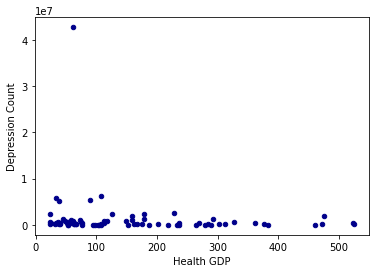

In [479]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


ax1 = health_gdp_depression_below_by_country.plot.scatter(x='Health GDP', y='Depression Count', c='DarkBlue')

### Correlation Coefficient

In [480]:
# calculate the correlation matrix
corr = health_gdp_depression_below_by_country.corr(method="spearman")
corr.loc['Depression Count']

Depression Count    1.000000
average             0.987474
Health GDP         -0.221204
Name: Depression Count, dtype: float64